# Examples \& Exercises

The example below 

1) reads and visualizes salinity (top and bottom) and gauge height data measured by water stations at Old Lyme [https://waterdata.usgs.gov/monitoring-location/USGS-01194796/#dataTypeId=continuous-90860-1995605579&period=P365D&showFieldMeasurements=true] and Essex [https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true] in the **Connecticut River Estuary**. They are roughly 6 km apart.

<!-- 2) [https://earth.google.com/web/search/Old+Lyme,+CT/@41.35664079,-72.30767612,29.22670256a,23720.52034737d,35y,0h,0t,0r/data=CiwiJgokCYhPUXUs90RAEYQZtozTfURAGecvDWk68FHAIXzZeeTjdlLAQgIIAUICCABKDQj___________8BEAA].  -->

3) also explore measurements from several water stations along the **Hudson River Estuary** via [USGS website](https://waterdata.usgs.gov/explore/#mapCenter=41.3668206309295,-74.20715332031251&dataCollections=continuous&keywords=Salinity&mapZoomLevel=8&locationTypes=SURFACE_WATER"). 

You may try the toy example by running the following scripts. Assignments will be the  <font color="orange">Exercises</font>. You can utilize the code from the examples or create your own. 
<!-- Undergrad students are *not* required to complete the "Exercise for grad students". -->

In [1]:
## make sure you uncomment this cell before running the rest of the notebook in Google Colab
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

In [2]:
# import python libraries
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load salinity data at Essex and Old Lyme, CT, respectively
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
# Old Lyme: https://waterdata.usgs.gov/monitoring-location/USGS-01194796/#dataTypeId=continuous-90860-1995605579&period=P365D&showFieldMeasurements=true
salinity_essex = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/Essex_salinity_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'salinity_top', 'salinity_top_cd', 'salinity_bottom', 'salinity_bottom_cd'])
salinity_oldlyme = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/OldLyme_salinity_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'salinity_top', 'salinity_top_cd', 'salinity_bottom', 'salinity_bottom_cd'])
salinity_oldlyme 

,agency_cd,site_no,datetime,tz_cd,salinity_top,salinity_top_cd,salinity_bottom,salinity_bottom_cd
0,USGS,1194796,2024-10-05 13:30,EDT,28.0,P,29.0,A
1,USGS,1194796,2024-10-05 13:45,EDT,27.0,P,29.0,A
2,USGS,1194796,2024-10-05 14:00,EDT,27.0,P,29.0,A
3,USGS,1194796,2024-10-05 14:15,EDT,28.0,P,29.0,A
4,USGS,1194796,2024-10-05 14:30,EDT,26.0,P,29.0,A
...,...,...,...,...,...,...,...,...
34977,USGS,1194796,2025-10-05 11:45,EDT,29.0,P,31.0,P
34978,USGS,1194796,2025-10-05 12:00,EDT,29.0,P,31.0,P
34979,USGS,1194796,2025-10-05 12:15,EDT,29.0,P,30.0,P
34980,USGS,1194796,2025-10-05 12:30,EDT,26.0,P,30.0,P


In [4]:
# load gaugeheight data at Essex and Old Lyme, CT, respectively
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
# Old Lyme: https://waterdata.usgs.gov/monitoring-location/USGS-01194796/#dataTypeId=continuous-90860-1995605579&period=P365D&showFieldMeasurements=true
gaugeheight_essex = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/Essex_gaugeheight_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'gauge_height', 'gauge_height_cd'])
gaugeheight_oldlyme = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/OldLyme_gaugeheight_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'gauge_height', 'gauge_height_cd'])
gaugeheight_oldlyme 

,agency_cd,site_no,datetime,tz_cd,gauge_height,gauge_height_cd
0,USGS,1194796,2024-10-05 13:30,EDT,3.18,A
1,USGS,1194796,2024-10-05 13:35,EDT,3.16,A
2,USGS,1194796,2024-10-05 13:40,EDT,3.13,A
3,USGS,1194796,2024-10-05 13:45,EDT,3.10,A
4,USGS,1194796,2024-10-05 13:50,EDT,3.08,A
...,...,...,...,...,...,...
104535,USGS,1194796,2025-10-05 12:35,EDT,1.64,P
104536,USGS,1194796,2025-10-05 12:40,EDT,1.56,P
104537,USGS,1194796,2025-10-05 12:45,EDT,1.46,P
104538,USGS,1194796,2025-10-05 12:50,EDT,1.40,P


(np.float64(20365.520833333332), np.float64(20366.520833333332))

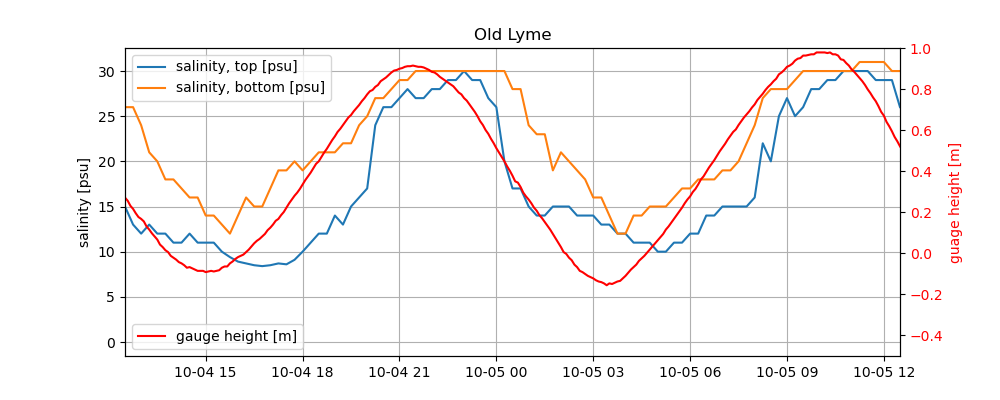

In [5]:
# plot salinity at river surface and bottom over a day, Old Lyme
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height [m]')
ax1.set_ylim([-.5, 1])
ax1.legend(loc="lower left") # add legends
ax.set_title("Old Lyme")
ax1.tick_params(axis='both', which='major', labelcolor='r')
ax1.set_ylabel('guage height [m]', color='r')
ax.set_ylabel('salinity [psu]')
ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

(np.float64(20365.520833333332), np.float64(20366.520833333332))

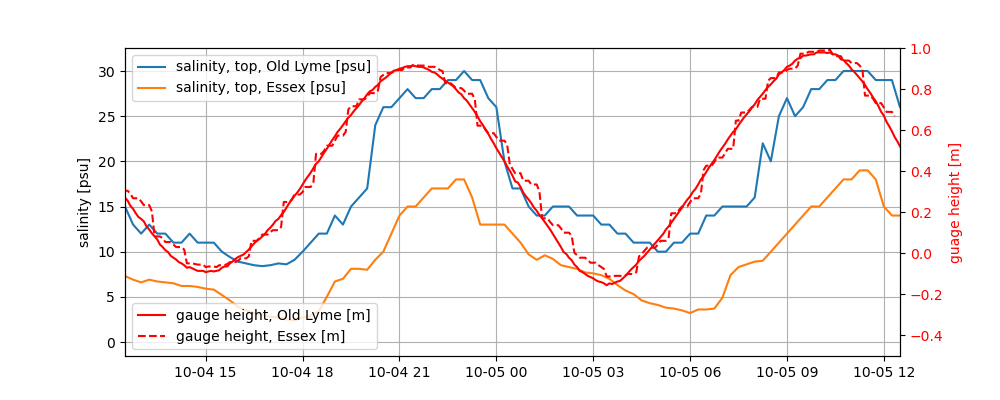

In [6]:
# plot salinity at river surface over a day, Old Lyme vs Essex
# %matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top, Old Lyme [psu]')
ax.plot(pd.to_datetime(salinity_essex.datetime), salinity_essex.salinity_top, label='salinity, top, Essex [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height, Old Lyme [m]')
ax1.plot(pd.to_datetime(gaugeheight_essex.datetime), gaugeheight_essex.gauge_height*.3048, 'r--', label='gauge height, Essex [m]')
ax1.set_ylim([-.5, 1])
ax1.legend(loc="lower left") # add legends

ax1.tick_params(axis='both', which='major', labelcolor='r')
ax1.set_ylabel('guage height [m]', color='r')
ax.set_ylabel('salinity [psu]')
ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Plot the surface and bottom salinity along with gauge height measured at the water station in Essex, over a single day of your choice—you may use your birthday between October 5, 2024, and October 4, 2025. Describe the range of salinity throughout the day and compare it to typical seawater salinity (35 psu). Discuss whether there is a difference between surface and bottom salinity, explain why this difference might occur based on seasonal conditions, and describe how the salinity patterns correlate with gauge height. Create a new plot showing bottom salinity and gauge height from both Essex and Old Lyme over the same day of your choice. Describe whether you observe any time lag between the salinity signals at the two stations, explain the possible reasons for this lag, and estimate the tidal current velocity during flood tide (note: the distance between the two stations is approximately 6 km). (1 pt)
</div>

In [7]:
# now we calculate one-year averaged salinity at river surface and bottom in Old Lyme
salinity_top_mean_oldlyme = np.mean(salinity_oldlyme.salinity_top)
salinity_bottom_mean_oldlyme = np.mean(salinity_oldlyme.salinity_bottom)

print(f"the one-year averaged top salinity in Old Lyme is {salinity_top_mean_oldlyme} psu")
print(f"the one-year averaged bottom salinity in Old Lyme is {salinity_bottom_mean_oldlyme} psu")

the one-year averaged top salinity in Old Lyme is 7.787384677095868 psu
the one-year averaged bottom salinity in Old Lyme is 14.30369739652485 psu


<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Calculate the one-year average salinity at the river surface and bottom in Essex. Based on the salinity difference between Old Lyme and Essex, determine whether the Connecticut River estuary is a positive, negative, or low-inflow estuary. Describe the direction of freshwater and seawater flow and which layer each occupies. (1 pt) 
Given that the average freshwater discharge ($R$) of the Connecticut River is approximately 500 m³/s, and assuming the estuary behaves as a two-layer system, use the average salinity values from your previous analysis to estimate the volume flux of the ocean–river exchange flow using the Knudsen relations: transport in the upper layer ($Q_U$) and the bottom layer ($Q_L$). How does the exchange flow flux ($Q_U+Q_L$) compare with the fresh water discharge? (1 pt)
</div>

<img src="../figures/lecture06/usgs_hudson_river.png" width="800"> 


<div class="alert alert-block alert-warning">
<b>Exercise 3:</b>
Go to the <a href="https://waterdata.usgs.gov/explore/#mapCenter=41.3668206309295,-74.20715332031251&dataCollections=continuous&keywords=Salinity&mapZoomLevel=8&locationTypes=SURFACE_WATER">USGS website</a> and explore at least three water monitoring stations within the Hudson River estuary. Locate the dataset titled "Salinity, water, unfiltered, practical salinity units at 25 degrees Celsius [HRECOS]" and click "Graph it" to plot salinity data. Describe how far into the estuary the brackish water (i.e., oligohaline + mesohaline zones) disappears and discuss its seasonality (1 pt). Then, click "Select data to graph on second y-axis", choose another variable of interest, and generate a second plot. Submit screenshots of your graphs and describe any observed correlation between salinity and the second variable, along with a hypothesis explaining the relationship. (1 pt)

</div>

# Your answers to the exercises:
Please complete your exercises below:

## Exercise 1
<div class="alert alert-block alert-warning">
<b>Exercise 1:</b> Plot the surface and bottom salinity along with gauge height measured at the water station in Essex, over a single day of your choice—you may use your birthday between October 5, 2024, and October 4, 2025. Describe the range of salinity throughout the day and compare it to typical seawater salinity (35 psu). Discuss whether there is a difference between surface and bottom salinity, explain why this difference might occur based on seasonal conditions, and describe how the salinity patterns correlate with gauge height. (1 pt) Create a new plot showing bottom salinity and gauge height from both Essex and Old Lyme over the same day of your choice. Describe whether you observe any time lag between the salinity signals at the two stations, explain the possible reasons for this lag, and estimate the tidal current velocity during flood tide (note: the distance between the two stations is approximately 6 km). (1 pt)
</div>

## Exercise 2
<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Calculate the one-year average salinity at the river surface and bottom in Essex. Based on the salinity difference between Old Lyme and Essex, determine whether the Connecticut River estuary is a positive, negative, or low-inflow estuary. Describe the direction of freshwater and seawater flow and which layer each occupies. (1 pt) 
Given that the average freshwater discharge of the Connecticut River is approximately 500 m³/s, and assuming the estuary behaves as a two-layer system, use the average salinity values from your previous analysis to estimate the volume flux of the ocean–river exchange flow using the Knudsen relations: transport in the upper layer ($Q_U$) and the bottom layer ($Q_L$). (1 pt)
</div>

## Exercise 3
<div class="alert alert-block alert-warning">
<b>Exercise 3:</b>
Go to the <a href="https://waterdata.usgs.gov/explore/#mapCenter=41.3668206309295,-74.20715332031251&dataCollections=continuous&keywords=Salinity&mapZoomLevel=8&locationTypes=SURFACE_WATER">USGS website</a> and explore at least three water monitoring stations within the Hudson River estuary. Locate the dataset titled "Salinity, water, unfiltered, practical salinity units at 25 degrees Celsius [HRECOS]" and click "Graph it" to plot salinity data. Describe how far into the estuary the brackish water (i.e., oligohaline + mesohaline zones) disappears and discuss its seasonality (1 pt). Then, click "Select data to graph on second y-axis", choose another variable of interest, and generate a second plot. Submit screenshots of your graphs and describe any observed correlation between salinity and the second variable, along with a hypothesis explaining the relationship. (1 pt)

</div>

## Additional Exercise
<div class="alert alert-block alert-warning">
<b>Additional Exercise: </b> Plot the Chlorophyll relative fluorescence (fChl) in relative fluorescence units (RFU) along with the Dissolved oxygen in milligrams per liter at Essex Island Top over the course of one year. Describe the patterns you observe in each dataset, explain possible reasons for those patterns, and discuss relations between chlorophyll and dissolved oxygen. (1 pt)
</div>

In [8]:
# load chlorophyll data at Essex, CT
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
chlorophyll_essex = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/Essex_chlorophyll_202401018-20251017.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'chlorophyll_top', 'chlorophyll_top_cd'])
chlorophyll_essex

,agency_cd,site_no,datetime,tz_cd,chlorophyll_top,chlorophyll_top_cd
0,USGS,1194750,2024-10-18 10:00,EDT,1.74,P
1,USGS,1194750,2024-10-18 10:15,EDT,1.71,P
2,USGS,1194750,2024-10-18 10:30,EDT,2.14,P
3,USGS,1194750,2024-10-18 10:45,EDT,2.27,P
4,USGS,1194750,2024-10-18 11:00,EDT,2.34,P
...,...,...,...,...,...,...
34555,USGS,1194750,2025-10-18 08:30,EDT,0.90,P
34556,USGS,1194750,2025-10-18 08:45,EDT,0.98,P
34557,USGS,1194750,2025-10-18 09:00,EDT,1.02,P
34558,USGS,1194750,2025-10-18 09:15,EDT,1.02,P


In [25]:
# load oxygen data at Essex, CT
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
oxygen_essex = pd.read_csv('https://raw.githubusercontent.com/ShuwenTan-PO/MARN-3060/refs/heads/main/data/lecture06/Essex_oxygen_202401018-20251017.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'oxygen_top', 'oxygen_top_cd', 'oxygen_bottom', 'oxygen_bottom_cd'])
oxygen_essex

,agency_cd,site_no,datetime,tz_cd,oxygen_top,oxygen_top_cd,oxygen_bottom,oxygen_bottom_cd
0,USGS,1194750,2024-10-18 11:00,EDT,8.9,P,8.7,P
1,USGS,1194750,2024-10-18 11:15,EDT,8.8,P,8.6,P
2,USGS,1194750,2024-10-18 11:30,EDT,8.7,P,8.6,P
3,USGS,1194750,2024-10-18 11:45,EDT,8.7,P,8.4,P
4,USGS,1194750,2024-10-18 12:00,EDT,8.6,P,8.5,P
...,...,...,...,...,...,...,...,...
35002,USGS,1194750,2025-10-18 09:30,EDT,8.0,P,8.1,P
35003,USGS,1194750,2025-10-18 09:45,EDT,7.9,P,8.0,P
35004,USGS,1194750,2025-10-18 10:00,EDT,7.9,P,8.0,P
35005,USGS,1194750,2025-10-18 10:15,EDT,7.9,P,8.1,P


In [29]:
# # plot chlorophyll and oxygen at river surface over a day, Old Lyme vs Essex
# %matplotlib widget 
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
# ax.plot(pd.to_datetime(oxygen_essex.datetime), oxygen_essex.oxygen_top, label='oxygen, top, Essex [mg/l]')
# ax.grid(True) # add grids
# ax.legend() # add legends

# # plot meters instead of feet
# ax1 = ax.twinx()
# ax1.plot(pd.to_datetime(chlorophyll_essex.datetime), chlorophyll_essex.chlorophyll_top, 'r--', label='chlorophyll, Essex [m]')
# ax1.legend(loc="lower left") # add legends

# ax1.tick_params(axis='both', which='major', labelcolor='r')
# ax1.set_ylabel('fChl [rfu]', color='r')
# ax.set_ylabel('do [mg/l]')